# CNN Model and Nearest Neighbors


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from tensorflow.keras.applications import ResNet101V2
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os

2024-12-05 23:22:52.911656: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-05 23:22:52.919347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 23:22:52.928577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 23:22:52.931619: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 23:22:52.940633: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # Added validation split

training_set = train_datagen.flow_from_directory('dataset',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('dataset',
                                                   target_size=(224, 224),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2416 images belonging to 10 classes.
Found 599 images belonging to 10 classes.


In [3]:
# Define ZFNet-like architecture (simplified CNN model)
base_model = Sequential([
        # First convolutional layer with 7x7 filter
        Conv2D(96, (7, 7), strides=(2, 2), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

        # Second convolutional layer with 5x5 filter
        Conv2D(256, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

        # Third convolutional layer with 3x3 filter
        Conv2D(384, (3, 3), activation='relu'),
        
        # Fourth convolutional layer with 3x3 filter
        Conv2D(384, (3, 3), activation='relu'),

        # Fifth convolutional layer with 3x3 filter
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),

        # Flatten layer before the fully connected layers
        Flatten(),

        # Fully connected layers
        Dense(4096, activation='relu'),
        Dropout(0.5),  # Dropout for regularization

    ])

# Add new fully connected layers for classification
new_classifier = Sequential([
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model = Sequential([
    base_model,  # Add ResNet101 as the base
    new_classifier  # Add the new classifier on top
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the new dataset (only the fully connected layers will be trained)
history = cnn_model.fit(training_set, validation_data=validation_set, epochs=10)

/home/bzmysr/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733419376.656739 1334732 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733419376.674791 1334732 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733419376.674832 1334732 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1733419376.678005 1334732 cuda_execut

Epoch 1/10


I0000 00:00:1733419379.451755 1334927 service.cc:146] XLA service 0x7f4d50010580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733419379.451787 1334927 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-12-05 23:22:59.477178: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-05 23:22:59.623425: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1733419389.903090 1334927 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.2617 - loss: 4.5464

2024-12-05 23:23:30.202318: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_116', 16 bytes spill stores, 16 bytes spill loads

2024-12-05 23:23:30.388147: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_116', 132 bytes spill stores, 132 bytes spill loads

2024-12-05 23:23:30.412186: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_123', 188 bytes spill stores, 188 bytes spill loads

2024-12-05 23:23:36.535841: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_116', 204 bytes spill stores, 204 bytes spill loads

2024-12-05 23:23:36.537440: I external/local_xla/xla/strea

76/76 ━━━━━━━━━━━━━━━━━━━━ 41s 389ms/step - accuracy: 0.2620 - loss: 4.5215 - val_accuracy: 0.3539 - val_loss: 1.7184
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - accuracy: 0.4863 - loss: 1.6612 - val_accuracy: 0.4224 - val_loss: 2.1070
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 203ms/step - accuracy: 0.6244 - loss: 1.1668 - val_accuracy: 0.6327 - val_loss: 1.1957
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - accuracy: 0.7279 - loss: 0.8275 - val_accuracy: 0.7145 - val_loss: 1.0449
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.8162 - loss: 0.6535 - val_accuracy: 0.7730 - val_loss: 0.7759
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.8412 - loss: 0.4955 - val_accuracy: 0.7529 - val_loss: 0.9150
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.8485 - loss: 0.4588 - val_accuracy: 0.6811 - val_loss: 1.2805
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 198ms/step - accuracy: 0.8491 - loss: 0.4864 - val_accuracy: 0.794

In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# Function to extract features from ResNet101 base (without the new fully connected layers)
def extract_features_fixed(image_path, base_model):
    img = load_img(image_path, target_size=(224, 224))  # Load image (InceptionV3 uses 224x224)
    img_array = img_to_array(img) / 255.0  # Preprocess the image (normalize)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    features = base_model.predict(img_array)  # Extract features from InceptionV3 base
    return features.flatten()  # Flatten the features to 1D

# Function to create feature list for nearest neighbors
def create_feature_list(dataset_dir, base_model):
    features_list = []
    image_paths = []
    
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png')):
                file_path = os.path.join(subdir, file)
                features = extract_features_fixed(file_path, base_model)
                features_list.append(features)
                image_paths.append(file_path)
    
    return np.array(features_list), image_paths

# Create feature list for the whole dataset
features_list, image_paths = create_feature_list("dataset", base_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Nearest images to dataset/airplanes/image_0026.jpg:
dataset/airplanes/image_0026.jpg - Distance: 0.0000
dataset/airplanes/image_0027.jpg - Distance: 0.1095
dataset/airplanes/image_0058.jpg - Distance: 0.1717
dataset/airplanes/image_0118.jpg - Distance: 0.1762
dataset/airplanes/image_0142.jpg - Distance: 0.1781
dataset/airplanes/image_0068.jpg - Distance: 0.1833
dataset/airplanes/image_0093.jpg - Distance: 0.1914
dataset/airplanes/image_0034.jpg - Distance: 0.1925
dataset/Motorbikes/image_0303.jpg - Distance: 0.1957
dataset/airplanes/image_0147.jpg - Distance: 0.1959


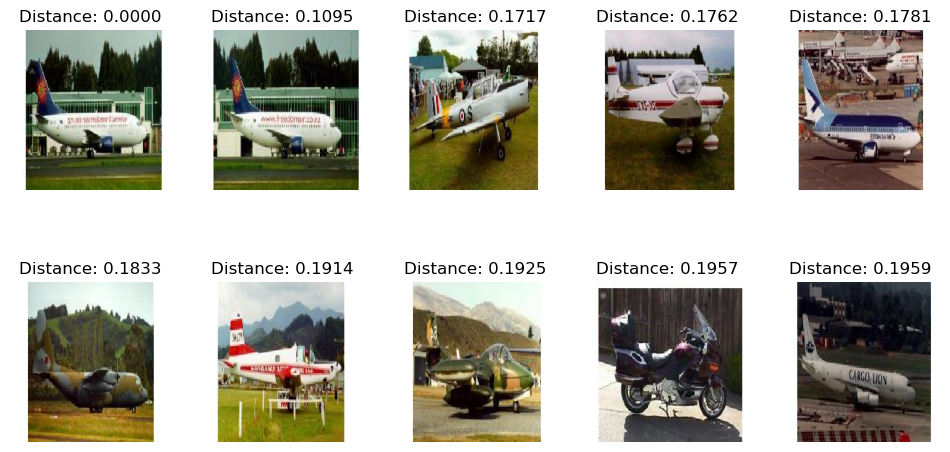

In [6]:
# Function to find the nearest images based on extracted features
def find_nearest_images(image_path, base_model, n_neighbors=10):
    # Extract features for the input image
    image_features = extract_features_fixed(image_path, base_model)
    
    # Using NearestNeighbors to find the nearest images
    neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    neighbors.fit(features_list)
    
    distances, indices = neighbors.kneighbors([image_features])
    
    # Print the nearest images and their distance
    print(f"Nearest images to {image_path}:")
    for i in range(n_neighbors):
        print(f"{image_paths[indices[0][i]]} - Distance: {distances[0][i]:.4f}")
    
    # Optionally, plot the nearest images
    plt.figure(figsize=(12, 6))
    for i in range(n_neighbors):
        img = load_img(image_paths[indices[0][i]], target_size=(224, 224))
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Distance: {distances[0][i]:.4f}")
    plt.show()

# Example usage: Finding nearest images
find_nearest_images('dataset/airplanes/image_0026.jpg', base_model, n_neighbors=10)